# diabetes.csv 분류

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/AI/5week/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y=df['Outcome']
y.value_counts()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 원 핫 인코딩

In [14]:
Y = pd.get_dummies(y).values

In [16]:
X = X.values

In [18]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [26]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\chaes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246 (984.00 B)

 Trainable params: 246 (984.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5550 - loss: 3.7035 - val_accuracy: 0.6935 - val_loss: 0.6733
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6720 - loss: 0.6750 - val_accuracy: 0.6935 - val_loss: 0.6255
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6278 - loss: 0.6601 - val_accuracy: 0.6935 - val_loss: 0.6224
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6328 - loss: 0.6583 - val_accuracy: 0.6935 - val_loss: 0.6242
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6240 - loss: 0.6631 - val_accuracy: 0.6935 - val_loss: 0.6223
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6467 - loss: 0.6499 - val_accuracy: 0.6935 - val_loss: 0.6236
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6383 - loss: 0.6556 - val_accuracy: 0.6935 - val_loss: 0.6243
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6295 - loss: 0.6599 - val_accuracy: 0.6935 - val

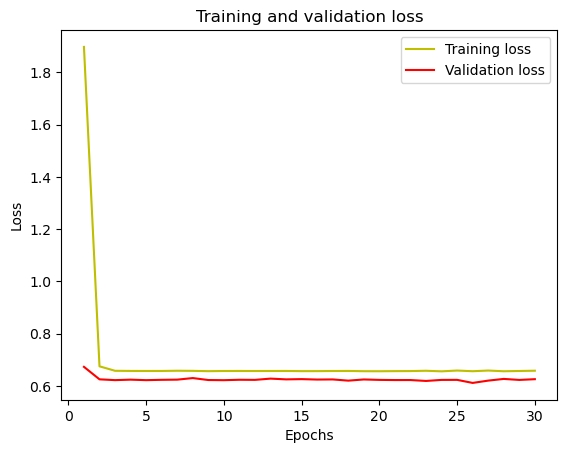

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

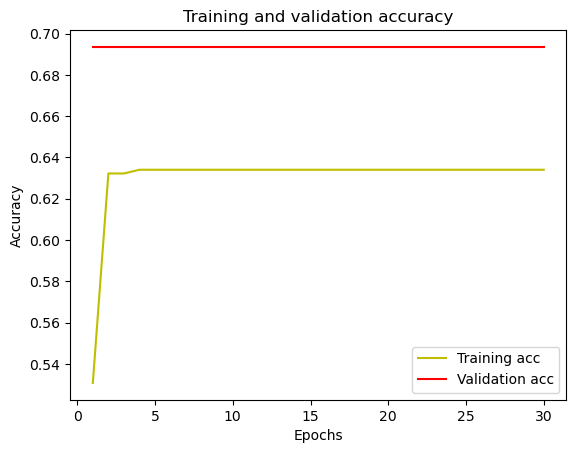

In [32]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [150]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]


C:\Users\chaes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chaes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chaes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# diabetes.csv 회귀

In [34]:
df = pd.read_csv("C:/AI/5week/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
df=df.drop('Outcome',axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [38]:
X=df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [40]:
y=df['BMI']
y.value_counts()
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [42]:
# 원 핫 인코딩
Y = pd.get_dummies(y).values

In [44]:
X = X.values

In [46]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [48]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [54]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.04), loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\chaes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,257 (4.91 KB)

 Trainable params: 1,257 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1328.5465 - mse: 1328.5465 - val_loss: 3.9787 - val_mse: 3.9787
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6754 - mse: 1.6754 - val_loss: 0.4156 - val_mse: 0.4156
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3455 - mse: 0.3455 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0669 - mse: 0.0669 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss:

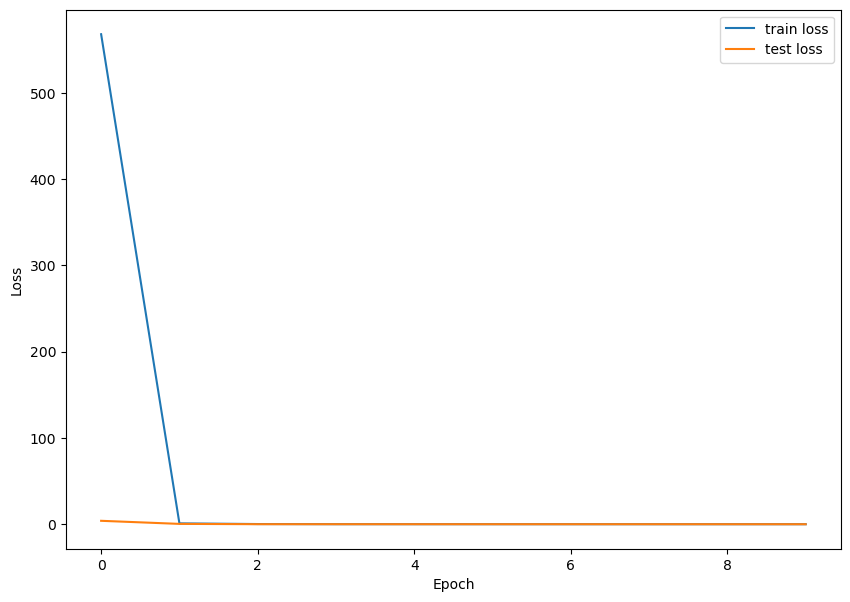

In [58]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0219 - mse: 0.0219


[0.02425248920917511, 0.02425248920917511]

# 자동차 평가 데이터 분류

In [117]:
df = pd.read_csv("C:/AI/5week/car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [119]:
df.columns = ["buying", "maint", "doors", "persons", "lug_capacity", "safety", "output"]
df

,buying,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [121]:
# 레이블 갯수 확인 (숫자)
df['output'].value_counts()

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [123]:
# 결측치 확인
df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

In [125]:
x=df.drop('output',axis=1)
x.head()

,buying,maint,doors,persons,lug_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [127]:
y=df['output']
y.value_counts()
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: output, dtype: object

## 원 핫 인코딩

In [130]:
Y = pd.get_dummies(y).values

In [132]:
X = pd.get_dummies(x).values

In [134]:
X

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False, False]])

In [136]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 21), (346, 21), (1382, 4), (346, 4))

In [142]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(21,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\chaes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 30)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 990 (3.87 KB)

 Trainable params: 990 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6647 - loss: 0.7500 - val_accuracy: 0.9065 - val_loss: 0.2676
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8546 - loss: 0.3119 - val_accuracy: 0.9209 - val_loss: 0.2019
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8952 - loss: 0.2467 - val_accuracy: 0.9353 - val_loss: 0.1805
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9334 - loss: 0.1578 - val_accuracy: 0.9496 - val_loss: 0.1331
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9561 - loss: 0.1285 - val_accuracy: 0.9353 - val_loss: 0.1789
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9206 - loss: 0.1661 - val_accuracy: 0.9784 - val_loss: 0.0897
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9633 - loss: 0.0970 - val_accuracy: 0.9640 - val_loss: 0.0912
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9693 - loss: 0.0834 - val_accuracy: 0.9640 - v

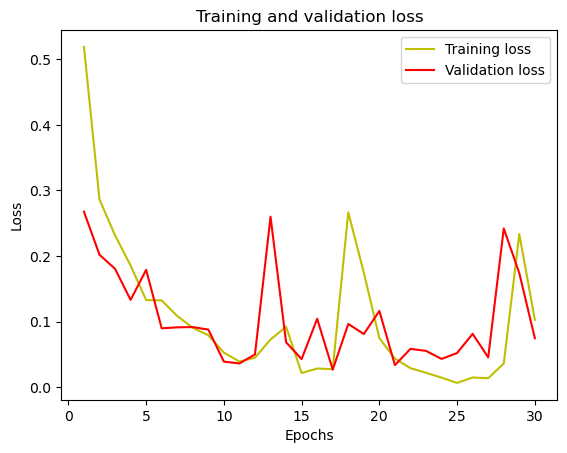

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

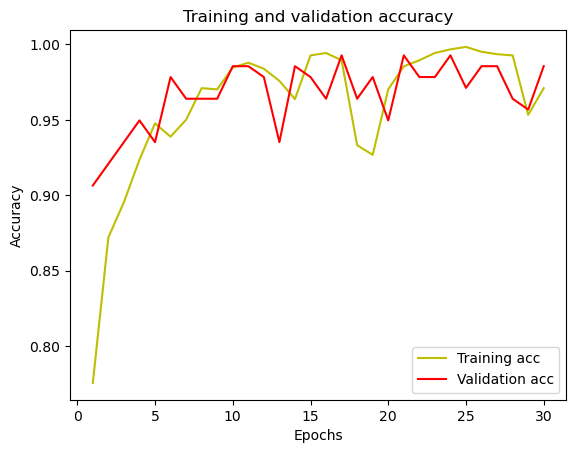

In [148]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [150]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.87      0.76      0.81        17
           2       1.00      0.99      0.99       240
           3       0.67      1.00      0.80        10

    accuracy                           0.97       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.98      0.97      0.97       346

[[ 76   2   0   1]
 [  0  13   0   4]
 [  3   0 237   0]
 [  0   0   0  10]]


# 전복데이터 회귀

In [153]:
df = pd.read_csv("C:/AI/5week/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [155]:
x=df.drop('Rings',axis=1)
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [157]:
y=df['Rings']
y.value_counts()
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [181]:
# 원 핫 인코딩
X = pd.get_dummies(x)
Y = pd.get_dummies(y).values

In [183]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True


In [185]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [189]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 10), (836, 10), (3341, 28), (836, 28))

In [191]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(10,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.04), loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\chaes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - l

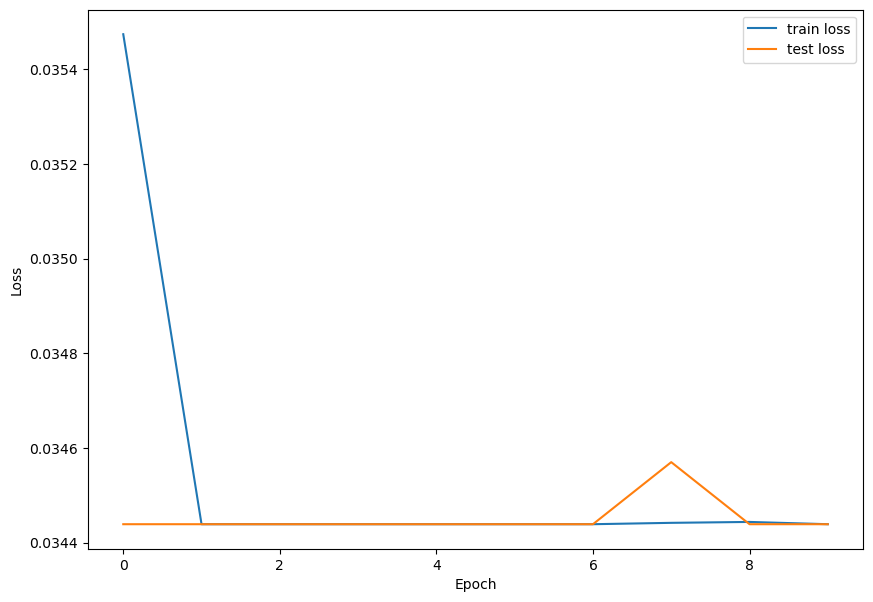

In [171]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [173]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 


[0.03443877026438713, 0.03443877026438713]